In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from keras.models import Sequential
from keras.layers import Activation, Dense, Dropout, LSTM, Masking
from keras.callbacks import ModelCheckpoint  

from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split

Using TensorFlow backend.


# Data extraction and exploration

In [2]:
data = pd.read_csv('train.csv')

In [3]:
data.head()

,Id,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,Feature_8,Feature_9,...,Ret_175,Ret_176,Ret_177,Ret_178,Ret_179,Ret_180,Ret_PlusOne,Ret_PlusTwo,Weight_Intraday,Weight_Daily
0,1,NaN,NaN,NaN,NaN,8.0,NaN,75751,0.2254,11.0,...,-0.002688,0.002246,-0.000838,-6.953224e-04,0.000003,-0.001974,-0.019512,0.028846,1.251508e+06,1.564385e+06
1,2,NaN,NaN,NaN,NaN,3.0,0.388896,17369,0.0166,13.0,...,-0.000129,0.000123,0.000248,3.315418e-07,0.000003,0.000027,-0.002939,-0.010253,1.733950e+06,2.167438e+06
2,3,NaN,-0.696727,0.739591,-0.167928,9.0,0.471947,8277,0.3650,9.0,...,-0.000524,-0.000394,0.000116,5.322557e-04,0.000274,0.000784,-0.024791,0.015711,1.529197e+06,1.911497e+06
3,4,NaN,-0.694350,1.568248,0.479073,5.0,0.120653,22508,0.2654,13.0,...,0.000346,-0.000090,0.000288,-1.281102e-04,0.000074,0.000341,-0.005680,-0.002190,1.711569e+06,2.139462e+06
4,5,6.0,-1.736489,2.765531,1.245280,7.0,4.866985,22423,0.2138,13.0,...,-0.001235,0.000027,0.002449,8.619882e-06,0.001209,-0.000004,0.036104,-0.026552,1.267270e+06,1.584088e+06


In [4]:
data.describe()

,Id,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,Feature_8,Feature_9,...,Ret_175,Ret_176,Ret_177,Ret_178,Ret_179,Ret_180,Ret_PlusOne,Ret_PlusTwo,Weight_Intraday,Weight_Daily
count,40000.00000,6687.000000,30854.000000,38763.000000,32279.000000,40000.000000,38067.000000,40000.000000,39531.000000,38125.000000,...,40000.000000,4.000000e+04,4.000000e+04,4.000000e+04,40000.000000,40000.000000,40000.000000,40000.000000,4.000000e+04,4.000000e+04
mean,20000.50000,3.590250,-0.117558,0.558392,0.405572,5.482775,0.430972,49244.971525,0.196958,10.680289,...,0.000049,-3.580980e-06,-9.675766e-06,-1.268935e-05,-0.000017,-0.000057,-0.000210,0.000012,1.504600e+06,1.880750e+06
std,11547.14972,2.798532,1.236250,0.902233,0.799082,2.942324,1.498274,28242.409717,0.138485,2.850634,...,0.001115,1.166019e-03,1.248956e-03,1.217967e-03,0.001208,0.001270,0.025039,0.024160,2.059143e+05,2.573928e+05
min,1.00000,1.000000,-3.440521,-4.643526,-5.440596,1.000000,-0.936644,338.000000,0.009800,0.000000,...,-0.018048,-1.786752e-02,-3.526027e-02,-4.864099e-02,-0.037215,-0.058046,-0.627690,-0.450779,1.000035e+06,1.250044e+06
25%,10000.75000,1.000000,-0.967186,-0.110192,-0.111696,2.000000,-0.265555,26143.000000,0.016600,9.000000,...,-0.000316,-3.943210e-04,-4.091851e-04,-3.649676e-04,-0.000361,-0.000413,-0.010521,-0.010055,1.357070e+06,1.696337e+06
50%,20000.50000,3.000000,-0.389162,0.437228,0.403516,6.000000,0.055564,48457.000000,0.213800,11.000000,...,0.000004,-4.039616e-07,4.016833e-07,6.407432e-07,0.000001,-0.000002,-0.000258,-0.000258,1.477713e+06,1.847142e+06
75%,30000.25000,6.000000,0.414442,1.064754,0.945944,8.000000,0.559921,72387.000000,0.331800,12.000000,...,0.000407,3.820685e-04,4.172179e-04,3.750965e-04,0.000378,0.000364,0.010005,0.009772,1.624389e+06,2.030486e+06
max,40000.00000,10.000000,4.175150,4.530405,2.953163,10.000000,12.609885,99861.000000,0.365000,36.000000,...,0.020781,3.061460e-02,4.406460e-02,2.922928e-02,0.048221,0.026112,0.795602,0.303038,2.761229e+06,3.451536e+06


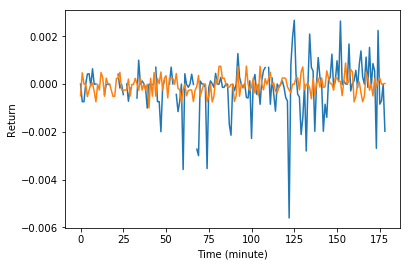

In [5]:
# Sample returns over time for first few assets
for i in range(0, 2):
    y = data.iloc[i]['Ret_2':'Ret_180']
    x = range(0, len(y))
    plt.plot(x, y)
plt.xlabel('Time (minute)')
plt.ylabel('Return')
plt.show()

In [6]:
# clean up
data.fillna(value=0, inplace=True) # replace nan with zeroes

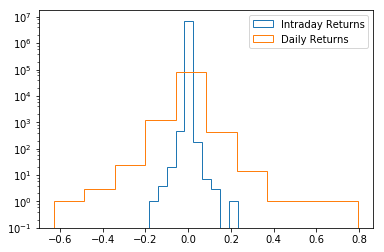

In [7]:
plt.hist(data.loc[:, 'Ret_2':'Ret_180'].values.flatten(), log=True,
        histtype='step', label='Intraday Returns')
plt.hist(data.loc[:,'Ret_PlusOne':'Ret_PlusTwo'].values.flatten(), log=True,
        histtype='step', label='Daily Returns')
plt.legend()
plt.show()

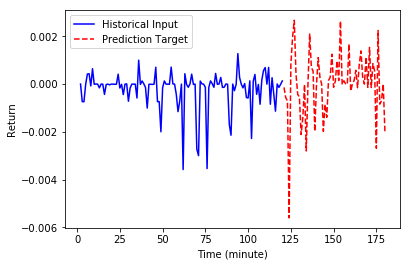

In [8]:
# Visualise target variables for a sample asset
sample_y = data.iloc[0]
sample_hist_y = sample_y['Ret_2':'Ret_120']
sample_target_y = sample_y['Ret_121':'Ret_180']
sample_hist_x = range(2,121)
sample_target_x = range(121,181)

plt.plot(sample_hist_x, sample_hist_y, 'b-', label='Historical Input')
plt.plot(sample_target_x, sample_target_y, 'r--', label='Prediction Target')
plt.xlabel('Time (minute)')
plt.ylabel('Return')
plt.legend()
plt.show()

# Data preprocessing

In [9]:
#returns_train = training_set.filter(like='Ret_', axis=1)
# TODO: split intraday and eod
n_features = 25
n_return_inputs = 119 + 2
n_return_intraday_output = 60
n_return_daily_output = 2


X = data.loc[:, 'Feature_1':'Ret_120'] # Features, as well as input returns
y = data.loc[:, 'Ret_121':'Weight_Daily'] # Output returns and weights, weights will be separated AFTER train_test_split

X_train_raw, X_test_raw, y_train_raw, y_test_raw = train_test_split(X, y, test_size=0.20, random_state=42)

In [10]:
def preprocess_data(x_raw, y_raw):
    # transform input into 3d matrix: samples x timesteps x features
    # for each sample duplicate the features for each timestep
    features = x_raw.loc[:, 'Feature_1':'Feature_25'].values[:, None, :]

    returns_intraday = x_raw.loc[:, 'Ret_2':'Ret_120'].values[:, :, None]
    features_repeated = np.repeat(features, returns_intraday.shape[1], axis=1)
    X_intraday = np.dstack((features_repeated, returns_intraday))
    
    returns_daily = x_raw.loc[:, 'Ret_MinusTwo':'Ret_MinusOne'].values[:, :, None]
    features_repeated = np.repeat(features, returns_daily.shape[1], axis=1)
    X_daily = np.dstack((features_repeated, returns_daily))
    
    X_combined = x_raw.loc[:, 'Ret_MinusTwo':'Ret_120'].values[:, :, None]
    features_repeated = np.repeat(features, X_combined.shape[1], axis=1)
    X_combined = np.dstack((features_repeated, X_combined))
    
    # targets should consist of returns only
    y_intraday = y_raw.loc[:, 'Ret_121':'Ret_180']
    y_daily = y_raw.loc[:, 'Ret_PlusOne':'Ret_PlusTwo']
    y_combined = y_train_raw.loc[:, 'Ret_121':'Ret_PlusTwo']
    
    weights_intraday = y_raw.loc[:, 'Weight_Intraday']
    weights_daily = y_raw.loc[:, 'Weight_Daily']
    
    return X_intraday, X_daily, y_intraday, y_daily, X_combined, y_combined, \
    weights_intraday, weights_daily

In [11]:
X_train_intraday, X_train_daily, y_train_intraday, y_train_daily, \
X_train_combined, y_train_combined, \
weights_train_intraday, weights_train_daily = preprocess_data(X_train_raw, y_train_raw)
    
X_test_intraday, X_test_daily, y_test_intraday, y_test_daily, \
X_test_combined, y_test_combined, \
weights_test_intraday, weights_test_daily = preprocess_data(X_test_raw, y_test_raw)

# Training the model

In [12]:
def build_lstm_model(input_data, output_size, neurons=20, activ_func='relu',
                     dropout=.4, loss='mae', loss_weights=None, sample_weight_mode=None, optimizer='adam'):
    model = Sequential()
    model.add(Masking(mask_value=0., input_shape=(input_data.shape[1], input_data.shape[2])))
    model.add(LSTM(neurons, input_shape=(input_data.shape[1], input_data.shape[2])))

    model.add(Dropout(dropout))
    model.add(Dense(units=2 * neurons))
    model.add(Dropout(dropout))
    model.add(Dense(units=output_size))
    model.add(Activation(activ_func))

    model.compile(loss=loss, loss_weights=loss_weights, sample_weight_mode=sample_weight_mode, optimizer=optimizer)
    return model

### Model for daily returns

In [21]:
# Initial testing/tuning only, slow and poor convergence!
'''
lstm_neurons = 20
epochs = 3
batch_size = 100
loss = 'mae'
dropout = 0.40
optimizer = 'adam'
activ_func = 'linear'

checkpointer_tuning = ModelCheckpoint(filepath='saved_models/best_weights_daily_tuning.hdf5', 
                               verbose=1, save_best_only=True)
model_tuning = build_lstm_model(X_train_daily, y_train_daily.shape[1], neurons=lstm_neurons, 
                               activ_func=activ_func, optimizer=optimizer,
                               dropout=dropout)
history_tuning = model_tuning.fit(X_train_daily, y_train_daily, validation_split=0.25, batch_size=batch_size, 
                           verbose=1, shuffle=True,
                            #sample_weight=weights_train_daily
                          epochs=epochs, callbacks=[checkpointer_tuning])
'''

Train on 24000 samples, validate on 8000 samples
Epoch 1/3
24000/24000 [==============================] - 2s 63us/step - loss: 0.2723 - val_loss: 0.0174

Epoch 00001: val_loss improved from in

In [14]:
lstm_neurons = 100
epochs = 3
batch_size = 500
loss = 'mae'
dropout = 0.20
optimizer = 'adam'
activ_func = 'relu'

checkpointer_daily = ModelCheckpoint(filepath='saved_models/best_weights_daily.hdf5', 
                               verbose=1, save_best_only=True)
model_daily = build_lstm_model(X_train_daily, y_train_daily.shape[1], neurons=lstm_neurons, 
                               activ_func=activ_func, optimizer=optimizer,
                               dropout=dropout)
history_daily = model_daily.fit(X_train_daily, y_train_daily, validation_split=0.25, batch_size=batch_size, 
                           verbose=1, shuffle=True,
                            #sample_weight=weights_train_daily, causes loss function to be nan
                          epochs=epochs, callbacks=[checkpointer_daily])

Train on 24000 samples, validate on 8000 samples
Epoch 1/3
24000/24000 [==============================] - 2s 65us/step - loss: 0.0357 - val_loss: 0.0154

Epoch 00001: val_loss improved from inf 

### Model for intraday returns

In [15]:
lstm_neurons = 250
epochs = 3
batch_size = 500
loss = 'mae'
dropout = 0.20
optimizer = 'adam'
activ_func = 'relu'

checkpointer_intraday = ModelCheckpoint(filepath='saved_models/best_weights_intraday.hdf5', 
                               verbose=1, save_best_only=True)
model_intraday = build_lstm_model(X_train_intraday, y_train_intraday.shape[1], neurons=lstm_neurons, 
                               activ_func=activ_func, optimizer=optimizer,
                               dropout=dropout)
history_intraday = model_intraday.fit(X_train_intraday, y_train_intraday, validation_split=0.25, batch_size=batch_size, 
                           verbose=1, shuffle=True,
                            #sample_weight=y_train_weights_daily,
                          epochs=epochs, callbacks=[checkpointer_intraday])

Train on 24000 samples, validate on 8000 samples
Epoch 1/3
24000/24000 [==============================] - 93s 4ms/step - loss: 0.0118 - val_loss: 6.3264e-04

# Results

In [16]:
def plot_sample_predictions(predictions, actual, samples=6):
    cols = min(samples, 3) # at most 3 columns
    rows = np.ceil(samples/3) # 3 graphs per row
    plt.figure(figsize=(5 * cols, 3 * rows))
    
    for i in range(1, samples + 1):
        plt.subplot(rows, cols, i)
        plt.plot(range(0, len(y_pred[i])), predictions[i], 'b-', label='predicted')
        plt.plot(range(0, len(y_pred[i])), actual[i], 'r--', label='actual') 
    plt.show()

### Daily Returns:

Weighted Mean Abosolute Error on testing set:
Model:  0.0149998204062
Zero benchmark:  0.0149998204062


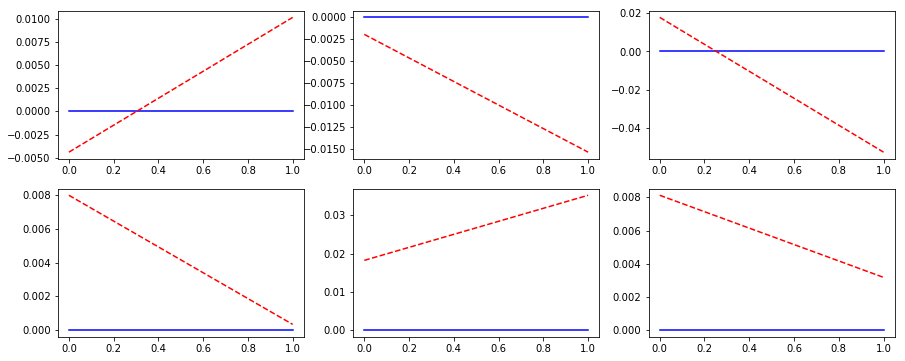

In [17]:
y_pred = model_daily.predict(X_test_daily)
zero_prediction = np.zeros(y_pred.shape)

print('Weighted Mean Abosolute Error on testing set:')
print('Model: ', mean_absolute_error(y_test_daily, y_pred, weights_test_daily))
print('Zero benchmark: ', mean_absolute_error(y_test_daily, zero_prediction, weights_test_daily))
plot_sample_predictions(predictions=y_pred, actual=y_test_daily.values)

### Intraday Returns:

Weighted Mean Abosolute Error on testing set:
Model:  0.000599515506184
Zero benchmark:  0.000599515506184


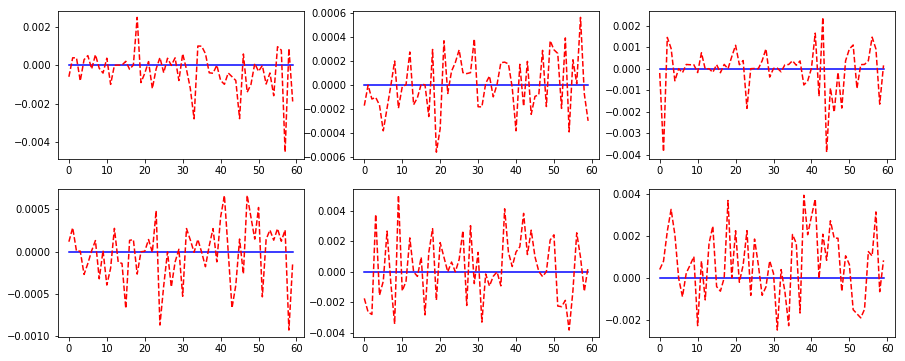

In [18]:
y_pred = model_intraday.predict(X_test_intraday)
zero_prediction = np.zeros(y_pred.shape)

print('Weighted Mean Abosolute Error on testing set:')
print('Model: ', mean_absolute_error(y_test_intraday, y_pred, weights_test_intraday))
print('Zero benchmark: ', mean_absolute_error(y_test_intraday, zero_prediction, weights_test_intraday))
plot_sample_predictions(predictions=y_pred, actual=y_test_intraday.values)

In [19]:
def plot_stock_price(actual_returns, base_price=100, samples=6):
    returns_list = actual_returns[:samples].copy()
    cols = min(samples, 3)  # at most 3 columns
    rows = np.ceil(samples/3)  # 3 graphs per row
    plt.figure(figsize=(5 * cols, 3 * rows))
    
    for i in range(0, samples):
        plt.subplot(rows, cols, i+1)
    
        # assuming the data provided are returns over minute intervals
        returns_list[i] += 1  
        returns_list[i] = np.cumprod(returns_list[i])
        actual_prices = returns_list[i] * base_price

        plt.plot(range(0, len(actual_prices)), actual_prices, 'b-', label='Actual prices')
        # zero return, shifted by 1 step in the x-axis
        plt.plot(range(1, len(actual_prices)), actual_prices[:-1], 'r--', label='Predicted prices')
        plt.legend()
    plt.show()

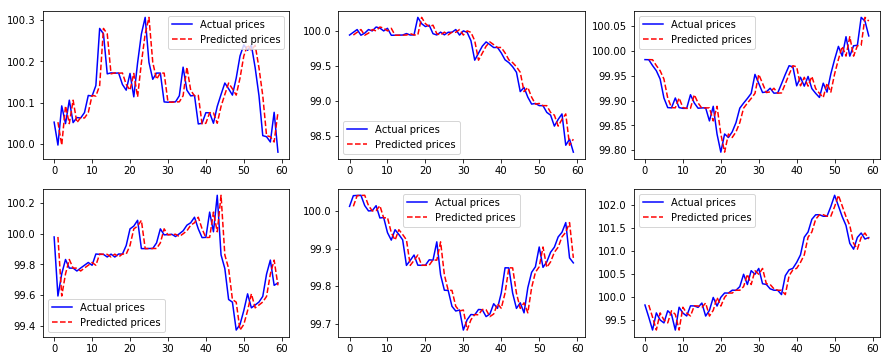

In [20]:
plot_stock_price(y_test_intraday.values)